In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import numpy as np

In [70]:
def logistic(x, x0, k, L):
    return L / (1 + np.exp(-k * (x - x0)))

# TODO : use tanh for the non-linearity instead of logistic
# scaling the latter is part of the problem?
# TODO compare eq 13,14 to 20,21 in Zandt 2014, you are missing 
# something important?

def phi(Isyn, I, g0, gs, sigma, L=500):
    tau = 2e-3  # second
    Vth = -55e-03  # volt
    Vreset = -60e-3 

    # Compute the single unit respose
    g = g0 + gs
    a = (g * sigma) / (tau * g0 * (Vth - Vreset))
    x = Isyn / (g * sigma)
    z = a * np.tanh(x)
    
    return z

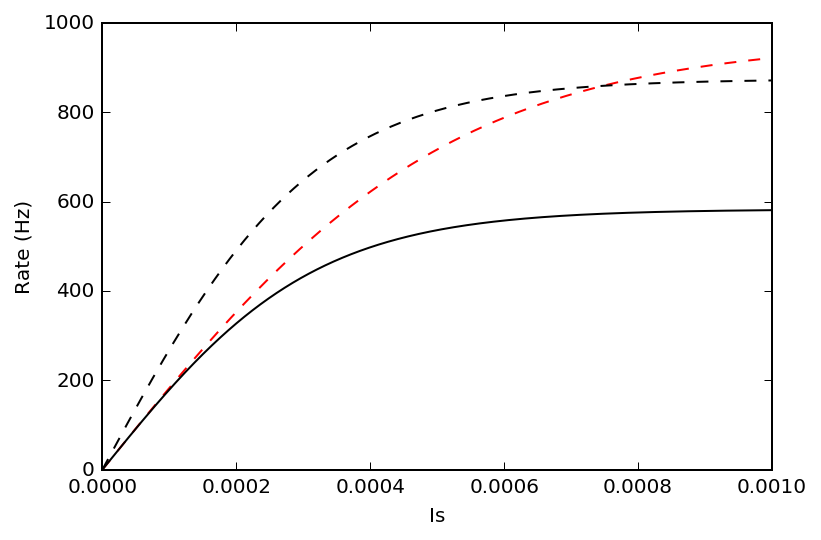

In [81]:
# %load ../test_phi.py
# from pacological.bluemass import phi


# Fixed values
I_e = 1e-3
Rb = 135e2
Wb = 400e-9 / 2 # 1600e-9
p = 0.02
N = 1000
C = p * N

# I sampling
Is = np.linspace(0, I_e, 1000)

# fixed
gb0 = Wb * Rb * C
gs0 = 1 * gb0
sigma0 = (2 * (gs0 ** 2)) / 2
rates0 = phi(Is, I_e, gb0, gs0, sigma0, L=L)

# var
gb = gb0 * 1
gs = gs0 * 1.2
sigma = sigma0 * 1.5
rates = phi(Is, I_e, gb, gs, sigma, L=L)

plt.plot(Is, rates, 'r--')
plt.plot(Is, rates0, 'k')
plt.plot(Is, 1.5*rates0, 'k--')
plt.xlabel("Is")
plt.ylabel("Rate (Hz)")